In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import statsmodels.tsa.stattools as stools
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [82]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,...,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
746,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,...,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
747,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,...,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
748,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,...,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


In [83]:
train = data.iloc[:600]
test = data.iloc[600:]

In [84]:
train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,35.56,54.13,43.30,32.20,48.11,26.61,20.48,62.17,39.26,60.68,...,75.37,41.80,38.53,27.13,73.56,28.75,68.72,17.80,78.39,32.86
596,35.32,54.19,42.84,31.67,48.08,26.78,20.84,61.32,38.72,60.37,...,75.69,41.57,38.31,27.36,73.30,28.97,68.95,17.79,78.78,32.61
597,35.36,54.80,42.45,31.83,48.11,26.85,20.67,61.65,38.75,59.02,...,75.60,41.46,38.89,26.96,72.75,29.02,68.78,17.49,79.38,32.60
598,35.28,55.10,42.63,32.42,48.29,26.75,20.32,62.48,38.69,58.42,...,75.09,41.60,38.65,27.12,72.46,28.94,69.50,17.27,80.40,32.38


In [85]:
test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
600,35.08,55.15,42.11,32.06,47.01,26.62,20.47,61.16,39.11,57.79,...,75.45,41.73,38.73,26.54,72.86,28.91,70.03,17.24,80.57,32.14
601,35.05,54.61,42.99,31.56,47.44,26.49,20.41,62.47,38.58,56.75,...,76.13,41.88,38.62,26.31,73.11,29.03,70.86,17.15,80.87,32.10
602,35.32,54.72,42.40,30.94,47.27,26.47,20.16,62.28,38.48,58.04,...,76.89,41.84,39.54,26.40,73.73,28.90,70.52,17.31,81.25,31.82
603,35.50,54.80,42.09,31.04,47.29,26.40,20.02,62.46,38.10,57.80,...,76.75,41.25,39.93,26.49,74.41,28.84,70.67,17.27,80.88,32.20
604,35.56,55.15,42.11,30.73,46.92,26.58,20.02,60.91,38.19,58.25,...,76.57,42.21,39.96,26.96,73.54,28.92,69.93,17.24,80.96,32.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,...,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
746,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,...,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
747,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,...,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
748,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,...,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


In [86]:
diction = {}
for i in range(50):
    for j in range(50):
        if i == j:
            continue
        coint_t, pvalue, crit_value = stools.coint(train[i], train[j], trend="ct", autolag="AIC")
        diction[i, j] = (coint_t, pvalue, crit_value)
        # Rough estimate for family rate 10%
        if pvalue < 8.42848604e-5:
            print(i, j)
with open("pairs.txt", "w") as fp:
    fp.write(str(diction))

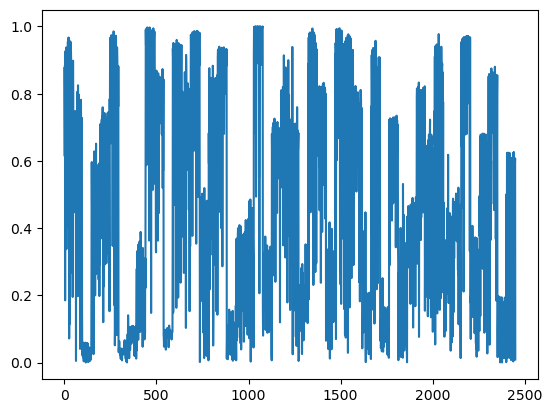

In [87]:
pvals = []
for pair, val in diction.items():
    pvals.append(val[1])
plt.plot(pvals)

In [88]:
all_pairs = list(diction.items())
all_pairs.sort(key=lambda x: x[1][1])
print(all_pairs)

[((48, 25), (np.float64(-5.15207263852234), np.float64(0.00046330598062228434), array([-4.35349356, -3.79648111, -3.50815311]))), ((2, 19), (np.float64(-5.112883878618331), np.float64(0.0005451076407406766), array([-4.35349356, -3.79648111, -3.50815311]))), ((6, 47), (np.float64(-5.104501138012896), np.float64(0.0005642852358783336), array([-4.35349356, -3.79648111, -3.50815311]))), ((48, 15), (np.float64(-5.013080228982854), np.float64(0.0008188856007148357), array([-4.35349356, -3.79648111, -3.50815311]))), ((37, 49), (np.float64(-4.940443246386855), np.float64(0.0010940133114270133), array([-4.35349356, -3.79648111, -3.50815311]))), ((48, 49), (np.float64(-4.888022443132165), np.float64(0.001343713675223458), array([-4.35349356, -3.79648111, -3.50815311]))), ((33, 20), (np.float64(-4.85113439983258), np.float64(0.0015501456881780859), array([-4.35349356, -3.79648111, -3.50815311]))), ((15, 1), (np.float64(-4.819110758595079), np.float64(0.0017528276235899895), array([-4.35349356, -3

In [89]:
diction[(48, 49)]

(np.float64(-4.888022443132165),
 np.float64(0.001343713675223458),
 array([-4.35349356, -3.79648111, -3.50815311]))

In [90]:
sort_pval = sorted(pvals)
family_error = []
for i in range(50):
    family_error.append(1 - (1 - sort_pval[i])**1250)

In [91]:
family_error

[np.float64(0.4396908953807912),
 np.float64(0.4941779403969243),
 np.float64(0.5061658914717815),
 np.float64(0.6408540181085962),
 np.float64(0.7454518397227138),
 np.float64(0.8137697718565416),
 np.float64(0.85617895694998),
 np.float64(0.888413703665946),
 np.float64(0.9373260675457535),
 np.float64(0.9755318187296974),
 np.float64(0.9797176312976873),
 np.float64(0.9883642426408218),
 np.float64(0.989998461713127),
 np.float64(0.993696182527312),
 np.float64(0.9980561773799033),
 np.float64(0.9982246965216933),
 np.float64(0.9990578882858506),
 np.float64(0.9991335707051678),
 np.float64(0.9997760092511548),
 np.float64(0.9997790011204025),
 np.float64(0.9998201625508883),
 np.float64(0.9998513944960967),
 np.float64(0.9998895335882504),
 np.float64(0.9999352831144611),
 np.float64(0.9999695748902807),
 np.float64(0.999983897686667),
 np.float64(0.9999904347117505),
 np.float64(0.9999929637572373),
 np.float64(0.999994135888022),
 np.float64(0.9999961277884171),
 np.float64(0.999

In [108]:
# Dig out the correlation between the two
A = 48
B = 25
x_with_const = sm.add_constant(train[A])
model = sm.OLS(train[B], x_with_const).fit()

In [109]:
print(model.params)
Beta = list(model.params)[1]
Beta

const    193.011815
48        -1.958881
dtype: float64


-1.9588810591992387

In [110]:
train_mean = np.mean(train[A] - Beta * train[B])
train_mean

np.float64(155.5338693201765)

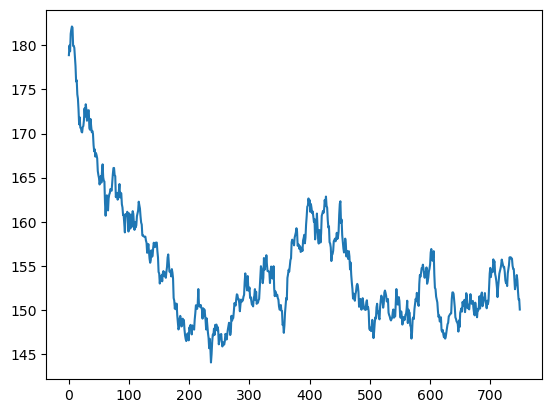

In [111]:
plt.plot(data[A] - Beta * data[B])

In [115]:
from statsmodels.tsa.api import VAR
model = VAR(data)
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        16.83       17.14   2.037e+07       16.95
1       -94.13     -78.26*  1.328e-41*     -88.01*
2       -91.79      -60.35   1.496e-40      -79.67
3       -89.72      -42.72   1.445e-39      -71.60
4       -88.07      -25.51   1.137e-38      -63.95
5       -86.68      -8.553   9.183e-38      -56.56
6       -86.21       7.484   4.422e-37      -50.08
7       -86.29       22.97   2.093e-36      -44.16
8       -87.35       37.47   7.664e-36      -39.23
9       -90.20       50.18   1.283e-35      -36.08
10     -95.05*       60.89   1.223e-35      -34.92
--------------------------------------------------


In [122]:
# Try the other johansen test
diction = {}
for i in range(50):
    for j in range(50):
        if i == j:
            continue
        result = coint_johansen(train[[i, j]], det_order=1, k_ar_diff=1)
        trace_0 = result.trace_stat[0]
        trace_crit_99 = result.trace_stat_crit_vals[0][2]
        if (trace_0 > trace_crit_99):
            print(i, j)
        diction[i, j] = result

1 15
1 33
1 37
2 6
2 7
2 8
2 11
2 15
2 18
2 19
2 20
2 22
2 25
2 26
2 29
2 30
2 33
2 34
2 35
2 36
2 37
2 40
2 43
2 45
2 46
2 48
2 49
4 33
6 2
6 7
6 8
6 11
6 13
6 18
6 20
6 26
6 29
6 33
6 35
6 37
6 42
6 45
6 47
6 48
7 2
7 6
7 8
7 10
7 11
7 15
7 18
7 22
7 25
7 35
7 36
7 37
7 45
7 48
8 2
8 6
8 7
8 10
10 7
10 8
10 28
11 2
11 6
11 7
11 18
11 26
11 29
11 33
11 35
11 37
11 44
11 48
13 6
13 18
15 1
15 2
15 7
15 20
15 25
15 34
15 37
15 48
15 49
18 2
18 6
18 7
18 11
18 13
18 21
18 22
18 29
18 33
18 34
18 35
18 37
18 38
18 41
18 46
18 48
19 2
19 26
19 46
19 49
20 2
20 6
20 15
20 26
20 30
20 33
20 37
20 48
21 18
22 2
22 7
22 18
22 33
22 35
22 37
22 43
22 48
22 49
25 2
25 7
25 15
25 33
25 37
25 48
25 49
26 2
26 6
26 11
26 19
26 20
26 35
28 10
29 2
29 6
29 11
29 18
30 2
30 20
33 1
33 2
33 4
33 6
33 11
33 18
33 20
33 22
33 25
33 35
33 37
33 48
33 49
34 2
34 15
34 18
34 37
35 2
35 6
35 7
35 11
35 18
35 22
35 26
35 33
35 48
36 2
36 7
37 1
37 2
37 6
37 7
37 11
37 15
37 18
37 20
37 22
37 25
37 33
37 34
37